# 자동차 연비 예측 모델 개발

In [59]:
!pip install ucimlrepo

In [60]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [61]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


# 결측치가 있는 row를 확인해서 결측치와 대조되는 컬럼의 데이터를 확인

<Axes: >

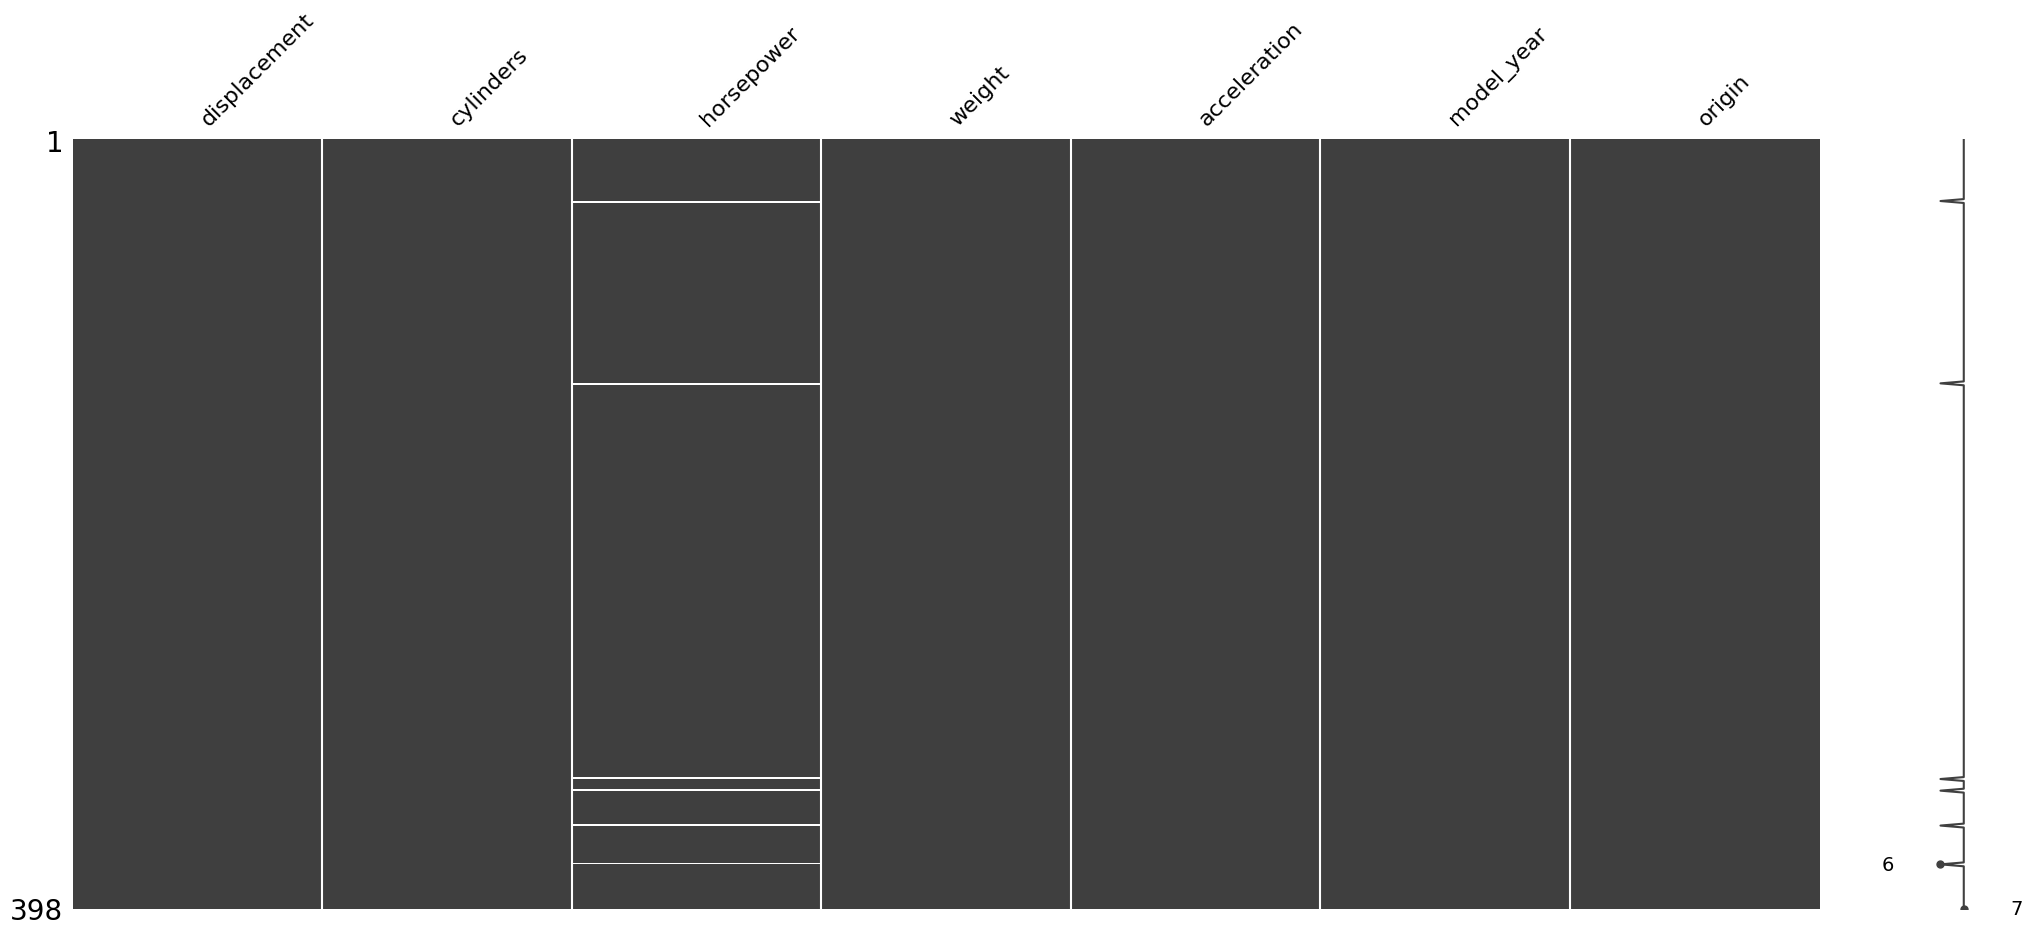

In [63]:
import missingno as msno
msno.matrix(X)

In [64]:
X[X.isna().any(axis=1)]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
32,98.0,4,NaN,2046,19.0,71,1
126,200.0,6,NaN,2875,17.0,74,1
330,85.0,4,NaN,1835,17.3,80,2
336,140.0,4,NaN,2905,14.3,80,1
354,100.0,4,NaN,2320,15.8,81,2
374,151.0,4,NaN,3035,20.5,82,1


In [65]:
X.groupby('cylinders')['horsepower'].mean()

,horsepower
cylinders,
3,99.250000
4,78.281407
5,82.333333
6,101.506024
8,158.300971


In [66]:
# 1 결측치를 제거한다.
# X.dropna(inplace=True)

# 2.결측치를 채운다(평균)
# X.fillna(X.mean(),inplace=True)

# 3. cylinders별로 평균을 구해서 채운다
X['horsepower'] = X['horsepower'].fillna( X.groupby('cylinders')['horsepower'].transform('mean') )
# X['horsepower'] = X['horsepower'].fillna( X['horsepower'].mean() )
X.info()


# 전체 평균
# RMSE: 2.862770005444669
# R2: 0.8475731044779455

# 실린더별 평균
# RMSE: 2.8624170856130307
# R2: 0.8476106842753683

# 결측치를 채울때 데이터의 특성을 고려해서 채우면 성능이 올라간다


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


<ipython-input-66-c0208e8addcc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'] = X['horsepower'].fillna( X.groupby('cylinders')['horsepower'].transform('mean') )


In [67]:
X.loc[126]

,126
displacement,200.000000
cylinders,6.000000
horsepower,101.506024
weight,2875.000000
acceleration,17.000000
model_year,74.000000
origin,1.000000


In [68]:
# 모델개발에 필요한 라이브러
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# X(학습용), y(정답) 데이터 분할 되어 있고
# 데이터를 학습용과 테스트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 7), (80, 7), (318, 1), (80, 1))

In [70]:
# 모델 만들고 학습하고 평가하고.. 그리고 예측
import numpy as np
lr = LinearRegression()  # 모델
lr.fit(X_train, y_train) # 학습
y_pred = lr.predict(X_test) # 예측
rmse = np.sqrt(mean_squared_error(y_test, y_pred) ) # 평가
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 2.8624170856130307
R2: 0.8476106842753683


# 회귀계수(coef_) 와 절편(intercept_)

In [71]:
lr.coef_, lr.intercept_

(array([[ 0.01447742, -0.15894993, -0.01477231, -0.00671369,  0.06174992,
          0.79306806,  1.33551873]]),
 array([-20.3002024]))

In [87]:
import pandas as pd
pd.Series(lr.coef_[0], index=X.columns,name='coef').sort_values(ascending=False)

,coef
origin,1.335519
model_year,0.793068
acceleration,0.061750
displacement,0.014477
weight,-0.006714
horsepower,-0.014772
cylinders,-0.158950


# 각 변수와 정답간의 선형성을 시각화  sns.regplot을 이용

<ipython-input-90-7d204bfffb0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg'] = y


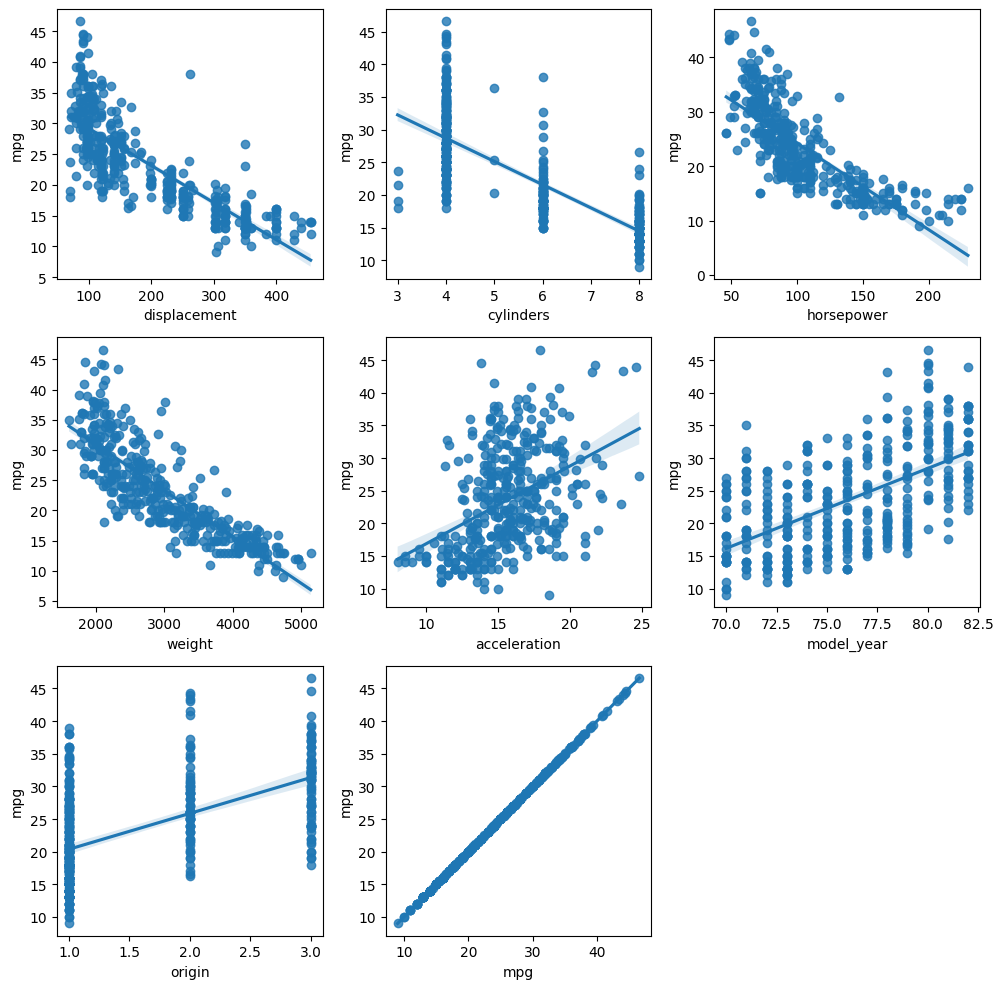

In [90]:
# 3 x 3
import matplotlib.pyplot as plt
import seaborn as sns

# sns 데이터프레임으로 처리한다
X['mpg'] = y
plt.figure(figsize=(10,10))
for idx, col in enumerate(X.columns):
  plt.subplot(3,3,idx+1)
  sns.regplot(x=col, y='mpg', data=X)

plt.tight_layout()
plt.show()